In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

In [3]:
N=100
tab_ra=np.linspace(0,360,N)
tab_dec=np.linspace(-90,90,N)
tab_l=np.linspace(0,360,N)
tab_b=np.linspace(-90,90,N)


In [25]:
import math

PI = math.pi
HALFPI = PI / 2.0
D2R = PI / 180.0
R2D = 1.0 / D2R

_sdsspar = {}
_sdsspar["center_ra"] = 185.0
_sdsspar["center_dec"] = 32.5
_sdsspar["node"] = (_sdsspar["center_ra"] - 90.0) * D2R
_sdsspar["etapole"] = _sdsspar["center_dec"] * D2R
_sdsspar["etaoffset"] = 91.25

def _thetaphi2xyz(theta, phi):
    """
    theta and phi in radians relative to the SDSS node at ra=95 degrees
    """
    x = np.cos(theta) * np.cos(phi)
    y = np.sin(theta) * np.cos(phi)
    z = np.sin(phi)

    return x, y, z

def eq2xyz(ra, dec, dtype="f8", units="deg"):
    """
    Convert equatorial coordinates RA and DEC to x,y,z on the unit sphere
    parameters
    ----------
    ra: scalar or array
        Right ascension. Can be an array
    dec: scalar or array
        Declination. Can be an array
    units: string, optional
        'deg' if the input is degrees, 'rad' if input
        is in radians.  Default is degrees.
    Notes:
        This follows the same convention as the STOMP package.
    """

    theta = np.array(ra, ndmin=1, copy=True, dtype=dtype)
    phi = np.array(dec, ndmin=1, copy=True, dtype=dtype)

    # in place is more efficient
    if units == "deg":
        np.deg2rad(theta, theta)
        np.deg2rad(phi, phi)

    theta -= _sdsspar["node"]

    return _thetaphi2xyz(theta, phi)

In [87]:
P=[]
X=[]
Y=[]
Z=[]


alpha=0.25
Rb=0.8
Rd=2.5
Zd=0.4

D=30/2
P.clear()
for ra in tab_ra:
    for dec in tab_dec:
        #b=np.arcsin(np.cos(dec)*np.cos(27.4)*np.cos(ra-192.25)+np.sin(dec)*np.sin(27.4))
        #l=np.arctan((np.sin(dec)-np.sin(b)*np.sin(27.4))/(np.cos(dec)*np.cos(27.4)*np.sin(ra-192.25)))+33
        b=np.arcsin(np.sin(dec)*np.cos(23.4))-np.cos(dec)*np.sin(23.4)*np.sin(ra)
        l=np.arctan((np.sin(dec)*np.sin(23.4)+np.cos(dec)*np.cos(23.4)*np.sin(ra))/np.cos(ra)*np.cos(dec))
        #coord=SkyCoord(l, b,frame="galactic", unit=(u.deg, u.deg))
        #coord1 = coord.cartesian
        X=D*np.cos(b)*np.cos(l)
        Y=D*np.cos(b)*np.sin(l)
        Z=D*np.sin(b)
        #X,Y,Z=eq2xyz(ra, dec, dtype="f8", units="deg")
        r_sq=X**2+Y**2+Z**2
        u_sq=X**2+Y**2
        P.append(
            (alpha*np.exp(-r_sq/Rb**2)+(1-alpha)*np.exp(-np.sqrt(u_sq)/Rd)*(1/np.cosh(Z/Zd))**2))

        

#from sklearn import preprocessing

#transformer = preprocessing.MinMaxScaler().fit(P)
#X_transformed = transformer.transform(P)

#print(P)

In [88]:
P_norm.clear
P_f.clear
P_log.clear
P_norm=[]
P_f=[]
P_log=[]
for i in range(len(P)):
    P_norm.append((P[i]-np.amin(P))/(np.amax(P)-np.amin(P)))
    P_f.append((1-0.1)*P_norm[i]+0.1)
for i in range(len(P_f)):
    P_log.append(np.log(P_f[i]))

In [77]:
P_tot = []
for i in range(N):
    P_tot.append([])

for i in range(N):
    P_tot[i]=P[0+N*i:(i+1)*N]
    


In [89]:
P_tot.clear
P_tot = []

for i in range(N):
    P_tot.append([])


for i in range(N):
    P_tot[i]=P_f[0+N*i:(i+1)*N]

    



In [90]:
print(np.shape(P_tot))
print(P_tot[8])

(100, 100)
[0.1000000000000149, 0.1, 0.10010735848170109, 0.1, 0.10000031328290777, 0.1, 0.10000000000000031, 0.10000000000925816, 0.1, 0.5779284958752297, 0.1, 0.10000000013475728, 0.10000000000000006, 0.1, 0.10000001544092353, 0.1, 0.10278412027643576, 0.1, 0.10000000000014576, 0.10000000000000961, 0.1, 0.10005661987487545, 0.1, 0.10000057796644997, 0.1, 0.10000000000000046, 0.10000000000551265, 0.1, 0.3881523095545357, 0.1, 0.10000000023394791, 0.10000000000000005, 0.1, 0.100000008588432, 0.1, 0.10535065058696566, 0.1, 0.10000000000023469, 0.10000000000000624, 0.1, 0.100029947083916, 0.1, 0.10000107032836462, 0.1, 0.10000000000000069, 0.10000000000330105, 0.1, 0.26177338250996196, 0.1, 0.10000000040824386, 0.10000000000000003, 0.1, 0.10000000479886109, 0.1, 0.11028921957700198, 0.1, 0.10000000000038015, 0.10000000000000407, 0.1, 0.10001588739544313, 0.1, 0.10000198942853858, 0.1, 0.10000000000000102, 0.10000000000198803, 0.1, 0.18729329926659208, 0.1, 0.10000000071600645, 0.10000000

In [91]:
evenly_spaced_interval= np.linspace(0, 1, 5)
cm = plt.get_cmap('plasma')
colors = [cm(x) for x in evenly_spaced_interval]
print(colors)

[(0.050383, 0.029803, 0.527975, 1.0), (0.494877, 0.01199, 0.657865, 1.0), (0.798216, 0.280197, 0.469538, 1.0), (0.973416, 0.585761, 0.25154, 1.0), (0.940015, 0.975158, 0.131326, 1.0)]


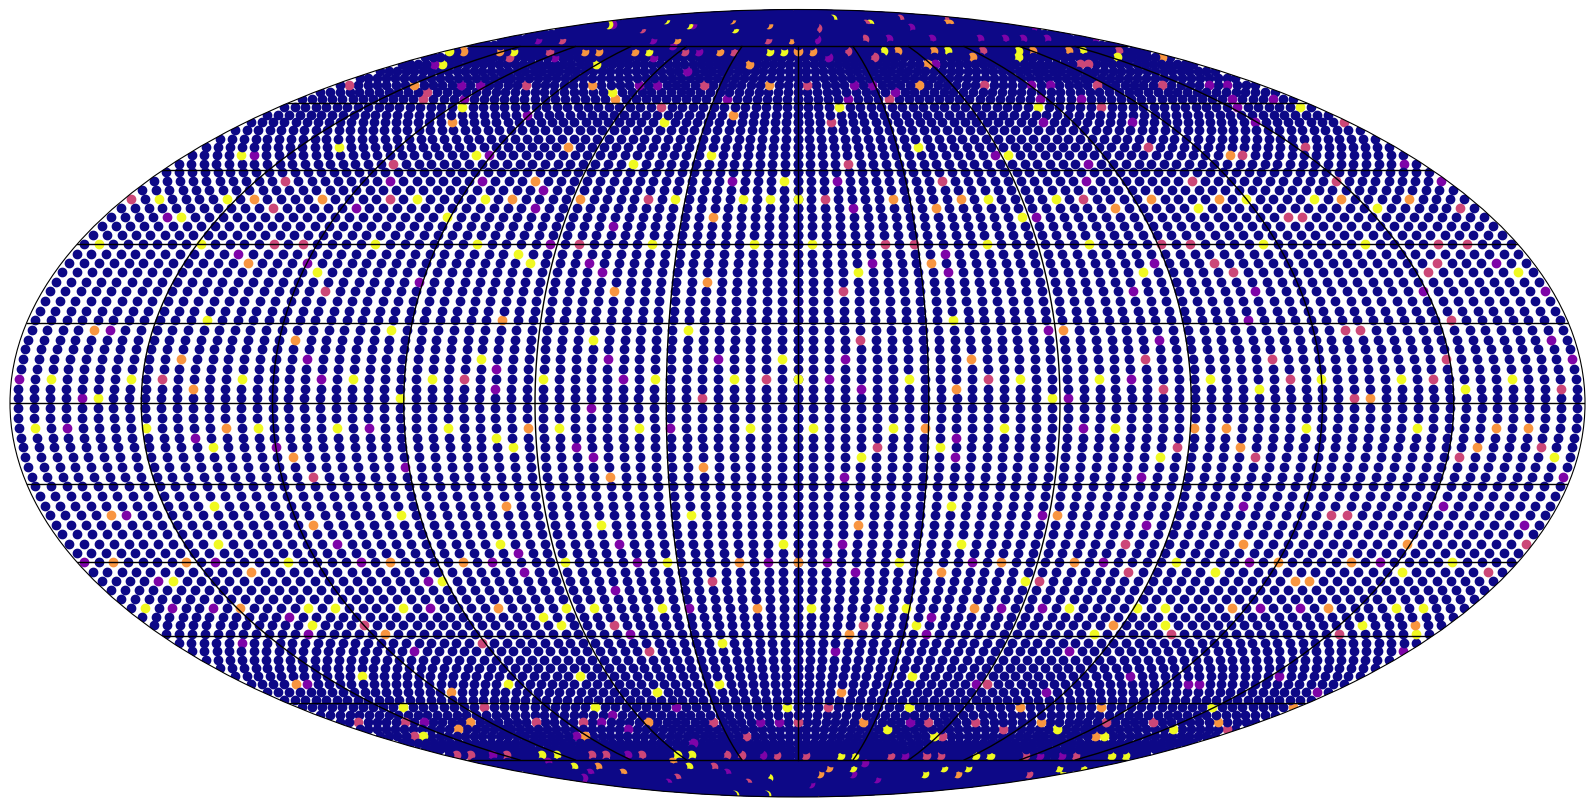

In [92]:
longt=tab_l
lat=tab_b
#color=(P())

############# converting degrees to radians between -pi and pi, and -pi/2 to pi/2 ###########
l=np.zeros(len(longt))
b=np.zeros(len(longt))
for i in range(len(longt)):
    b[i]=lat[i]*np.pi/180.0
    if longt[i]<180:
        l[i]=-(longt[i]*np.pi/180.0)
    else:
        l[i]=2*np.pi-(longt[i]*np.pi/180.0)


######## plotting the figure ##########
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection="mollweide")
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.grid(True)
ax.grid(color='black', linestyle='-', linewidth=1)

for i in range(len(tab_l)):
    for j in range(len(tab_b)):
        if (P_tot[i][j]>=0) & (P_tot[i][j]<0.2):
            color=colors[0]
        if (P_tot[i][j]>=0.2) & (P_tot[i][j]<0.4):
            color=colors[1]
        if (P_tot[i][j]>=0.4) & (P_tot[i][j]<0.6):
            color=colors[2]
        if (P_tot[i][j]>=0.6) & (P_tot[i][j]<0.8):
            color=colors[3]
        if (P_tot[i][j]>=0.8) & (P_tot[i][j]<=1):
            color=colors[4]

        im=ax.scatter(l[i],b[j],color=color)
        
#cbar=fig.colorbar(im,cax=None,shrink=0.7,orientation="horizontal",pad=0.02)
#cbar.set_label(color_label, size=25)
#cbar.ax.tick_params(labelsize=25)
#ax.text(0,-1.5,"(0,-90)",fontsize=25)
#ax.text(0,1.4,"(0,90)",fontsize=25)
#ax.text(-np.pi/2.0,0,"(90,0)",fontsize=25)
#ax.text(np.pi/2.0,0,"(270,0)",fontsize=25)
#ax.text(0,0,"(0,0)",fontsize=25)
plt.tight_layout(pad=0.9)
plt.show()




In [ ]:
for i in range(len(tab_l)):
    for j in range(len(tab_b)):
        if (P_tot[i][j]>=-2.5) & (P_tot[i][j]<-2.25):
            color=colors[0]
        if (P_tot[i][j]>=-2.25) & (P_tot[i][j]<-2):
            color=colors[1]
        if (P_tot[i][j]>=-2) & (P_tot[i][j]<-1.5):
            color=colors[2]
        if (P_tot[i][j]>=1.5) & (P_tot[i][j]<-1):
            color=colors[3]
        if (P_tot[i][j]>=-1) & (P_tot[i][j]<=0):
            color=colors[4]


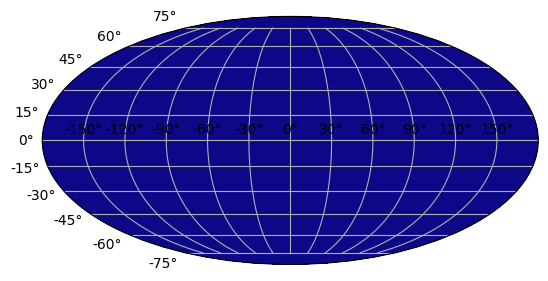

In [114]:
import matplotlib
from astropy.coordinates import SkyCoord
coords = SkyCoord(l, b, unit='deg', frame="galactic")

plt.figure()
plt.subplot(111, projection='mollweide')

for i in range(len(l)):
    for j in range(len(b)):
        plt.scatter(l[i],b[j],c=P_tot[i][j], cmap='plasma'), 
            #norm=matplotlib.colors.LogNorm(vmax=np.nanmax(P_tot)))


plt.grid()
plt.show()

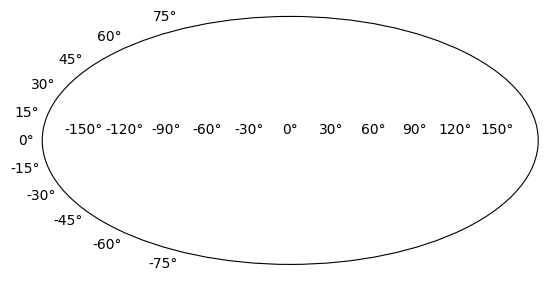

In [110]:
L,B = np.meshgrid(tab_l, tab_b)


plt.figure()
plt.subplot(111, projection='mollweide')
plot = ax.pcolor(tab_l,tab_b,P_tot,vmin=np.abs(P_tot).min(), vmax=np.abs(P_tot).max())
cb = fig.colorbar(plot, ax=ax)